## 1) Data Preprocessing

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('spam.tsv', sep = '\t')

In [4]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [6]:
df.isna().sum()
# in our case no missing value

label      0
message    0
length     0
punct      0
dtype: int64

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
length,5572.0,80.489950,59.942907,2.0,36.0,62.0,122.0,910.0
punct,5572.0,4.177495,4.623919,0.0,2.0,3.0,6.0,133.0


In [12]:
df['label'].value_counts()/ len(df) * 100
# so we can see 86% is ham so its kind of unbalanced dataset

ham     86.593683
spam    13.406317
Name: label, dtype: float64

In [13]:
ham  = df[df['label'] == 'ham']
spam = df[df['label'] == 'spam']

In [14]:
ham.shape, spam.shape

((4825, 4), (747, 4))

In [15]:
ham = ham.sample(spam.shape[0])

In [16]:
ham.shape, spam.shape

((747, 4), (747, 4))

In [18]:
data = ham.append(spam, ignore_index = True)

In [19]:
data.shape

(1494, 4)

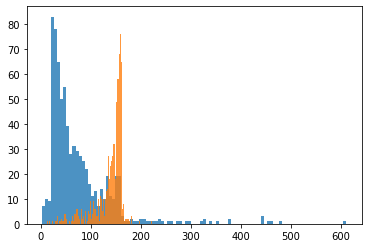

In [25]:
plt.hist(data[data['label'] == 'ham']['length'], bins = 100, alpha = 0.8)
plt.hist(data[data['label'] == 'spam']['length'], bins = 100, alpha = 0.8)
plt.show()

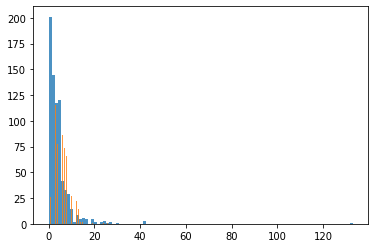

In [26]:
plt.hist(data[data['label'] == 'ham']['punct'], bins = 100, alpha = 0.8)
plt.hist(data[data['label'] == 'spam']['punct'], bins = 100, alpha = 0.8)
plt.show()

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size = 0.3, random_state = 0, shuffle = True)

In [30]:
X_train.shape, X_test.shape

((1045,), (449,))

## 2) Building the Model(Random Forest)

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [67]:
classifier = Pipeline([("tfidf", TfidfVectorizer()), ("classifier", RandomForestClassifier(n_estimators = 10 ))])

In [68]:
classifier.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None

## 3) Predicting the results (Random Forest)

In [69]:
y_pred = classifier.predict(X_test)

In [70]:
y_test, y_pred

(799     spam
 1047    spam
 1436    spam
 54       ham
 793     spam
         ... 
 824     spam
 822     spam
 644      ham
 1034    spam
 1356    spam
 Name: label, Length: 449, dtype: object,
 array(['spam', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'ham', 'spam', 'ham', 'ham', 'ham', 'spam', 'spam', 'spam', 'ham',
        'ham', 'spam', 'spam', 'ham', 'ham', 'spam', 'ham', 'spam', 'ham',
        'ham', 'spam', 'ham', 'ham', 'spam', 'ham', 'spam', 'spam', 'spam',
        'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham',
        'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'spam',
        'spam', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham',
        'spam', 'spam', 'ham', 'ham', 'ham', 'spam', 'spam', 'spam',
        'spam', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'spam', 'ham', 'ham', 'ham', 'ham', 'spam', 'spam', 'ham', 'spam',
        'spam', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 's

In [71]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [72]:
accuracy_score(y_test, y_pred)

0.9287305122494433

In [73]:
confusion_matrix(y_test, y_pred)

array([[224,   3],
       [ 29, 193]])

In [74]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.89      0.99      0.93       227
        spam       0.98      0.87      0.92       222

    accuracy                           0.93       449
   macro avg       0.94      0.93      0.93       449
weighted avg       0.93      0.93      0.93       449



## 4) Building the Model (SVM)

In [42]:
from sklearn.svm import SVC

In [45]:
svm = Pipeline([("tfidf", TfidfVectorizer()), ("classifier", SVC(C=100, gamma = 'auto'))])

In [46]:
svm.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('classifier',
                 SVC(C=100, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ov

### 4.1) Prediction

In [47]:
y_pred = svm.predict(X_test)

In [48]:
accuracy_score(y_test, y_pred)

0.9465478841870824

In [49]:
confusion_matrix(y_test, y_pred)

array([[222,   5],
       [ 19, 203]])

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.92      0.98      0.95       227
        spam       0.98      0.91      0.94       222

    accuracy                           0.95       449
   macro avg       0.95      0.95      0.95       449
weighted avg       0.95      0.95      0.95       449



### 5) XGBoost Classifier 


In [51]:
from xgboost import XGBClassifier

In [52]:
xgb = Pipeline([("tfidf", TfidfVectorizer()), ("classifier", XGBClassifier())])

In [53]:
xgb.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.1,
                               max_delta_step=0, max_depth=3,
                        

### 5.1) XGB prediction

In [55]:
y_pred = xgb.predict(X_test)

In [56]:
accuracy_score(y_test, y_pred)

0.9086859688195991

In [57]:
confusion_matrix(y_test, y_pred)

array([[217,  10],
       [ 31, 191]])

In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.88      0.96      0.91       227
        spam       0.95      0.86      0.90       222

    accuracy                           0.91       449
   macro avg       0.91      0.91      0.91       449
weighted avg       0.91      0.91      0.91       449



### 6) Predic Testing Data both model

In [77]:
test1 = ["Hello, You are reading Ogulcan's code"]
test2 = ["Hope you are doing good and learning new things !"]
test3 = ["Congratulations, you won a lottery ticket worth $1 Billion! To claim call on 123456"]

In [78]:
print(classifier.predict(test1))
print(classifier.predict(test2))
print(classifier.predict(test3))

['ham']
['ham']
['spam']


In [79]:
print(svm.predict(test1))
print(svm.predict(test2))
print(svm.predict(test3))

['ham']
['ham']
['spam']


In [80]:
print(xgb.predict(test1))
print(xgb.predict(test2))
print(xgb.predict(test3))

['ham']
['ham']
['spam']
